In [1]:
# With a clean dataset of all climbing routes and all sport routes across states, we can now analyze:

# The distribution of sport climbing routes across states by grade.
    # Which state has the hardes sport climbing routes (most routes >=9a)?
    # How many hard grades (>= 9a) are there in the states?
    # Which state has the most sport climbing routes?
    # Since trad climbing is very common in the US, which state has the most trad routes?
    # Which state has the most sport climbing routes relative to all types of climbing?

    # For a more fair/relevant comparison, lets consider state area:
        # Which state has the most dense distribution of sport routes?


# Analysis of US Rock climbing data
After extracting and cleaning OpenBeta's scrape of Mountain Projects database of rock climbs within the US (https://github.com/OpenBeta/climbing-data), further cleaning of the data was performed to obtain a clean file for analysis (data_preparation.ipynb). The result was saved under Data_final.xslx.



In [2]:
# load packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import glob

# import the data
data = pd.read_excel("G:\My Drive\Trainings\Python\Trainings_file\climbing project\Cleaned dataset\Data_final.xlsx")


In [8]:
# Make sure the column 'French grading' is of type str so the x-axis in graphs is sorted correctly.
# To avoid errors with NaN values we rename them to blanks.
data.fillna('', inplace=True)
data['French_grading'] = data['French_grading'].astype("string")

# filter the data set for only sport routes.
# Sport routes are labelled as TRUE in the df which is interpreted as 1 my Python.
# We create a from data independent copy of sport.
sport = data[data.sport == 1].copy()
# Filter out ungraded routes
sport = sport[sport['French_grading'] != '']

print(sport)


                                       route_name mp_sector_id mp_route_id  \
78                               teaching station                            
79                                    rap station                            
170                                   The Walk Up                            
269    Booty Flowers Pedals Away (Closed Project)                            
270          Worship and Tribute (Closed Project)                            
...                                           ...          ...         ...   
95275                          Full Metal Brisket                            
95276                             Project- closed                            
95277                 Open Project (Bill Clinton)                            
95278                        Wet Dream/Wet Banana                            
95282            Diluted Limelight - Open Project                            

      State YDS_grading French_grading Ewbanks_grading UIAA_gra

## plot the spread of grades across the states in a count plot.

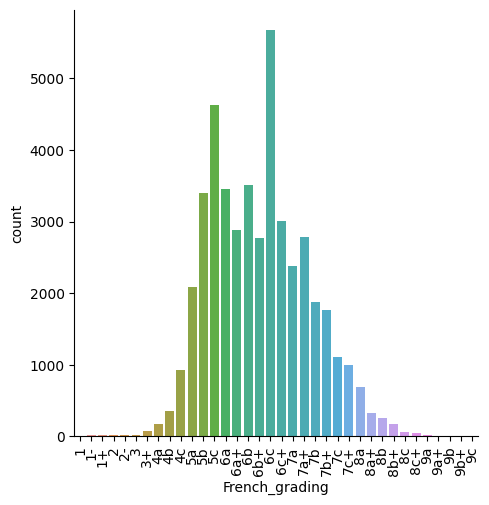

In [9]:
# plot the spread of grades across the states in a count plot.
sns.catplot(x= 'French_grading', kind = 'count', data = sport)

# rotate the x axis labels to make it more readable
plt.xticks(rotation=90)

# Show the plot
plt.show()


## plot the spread of grades across individual states in a count plot.

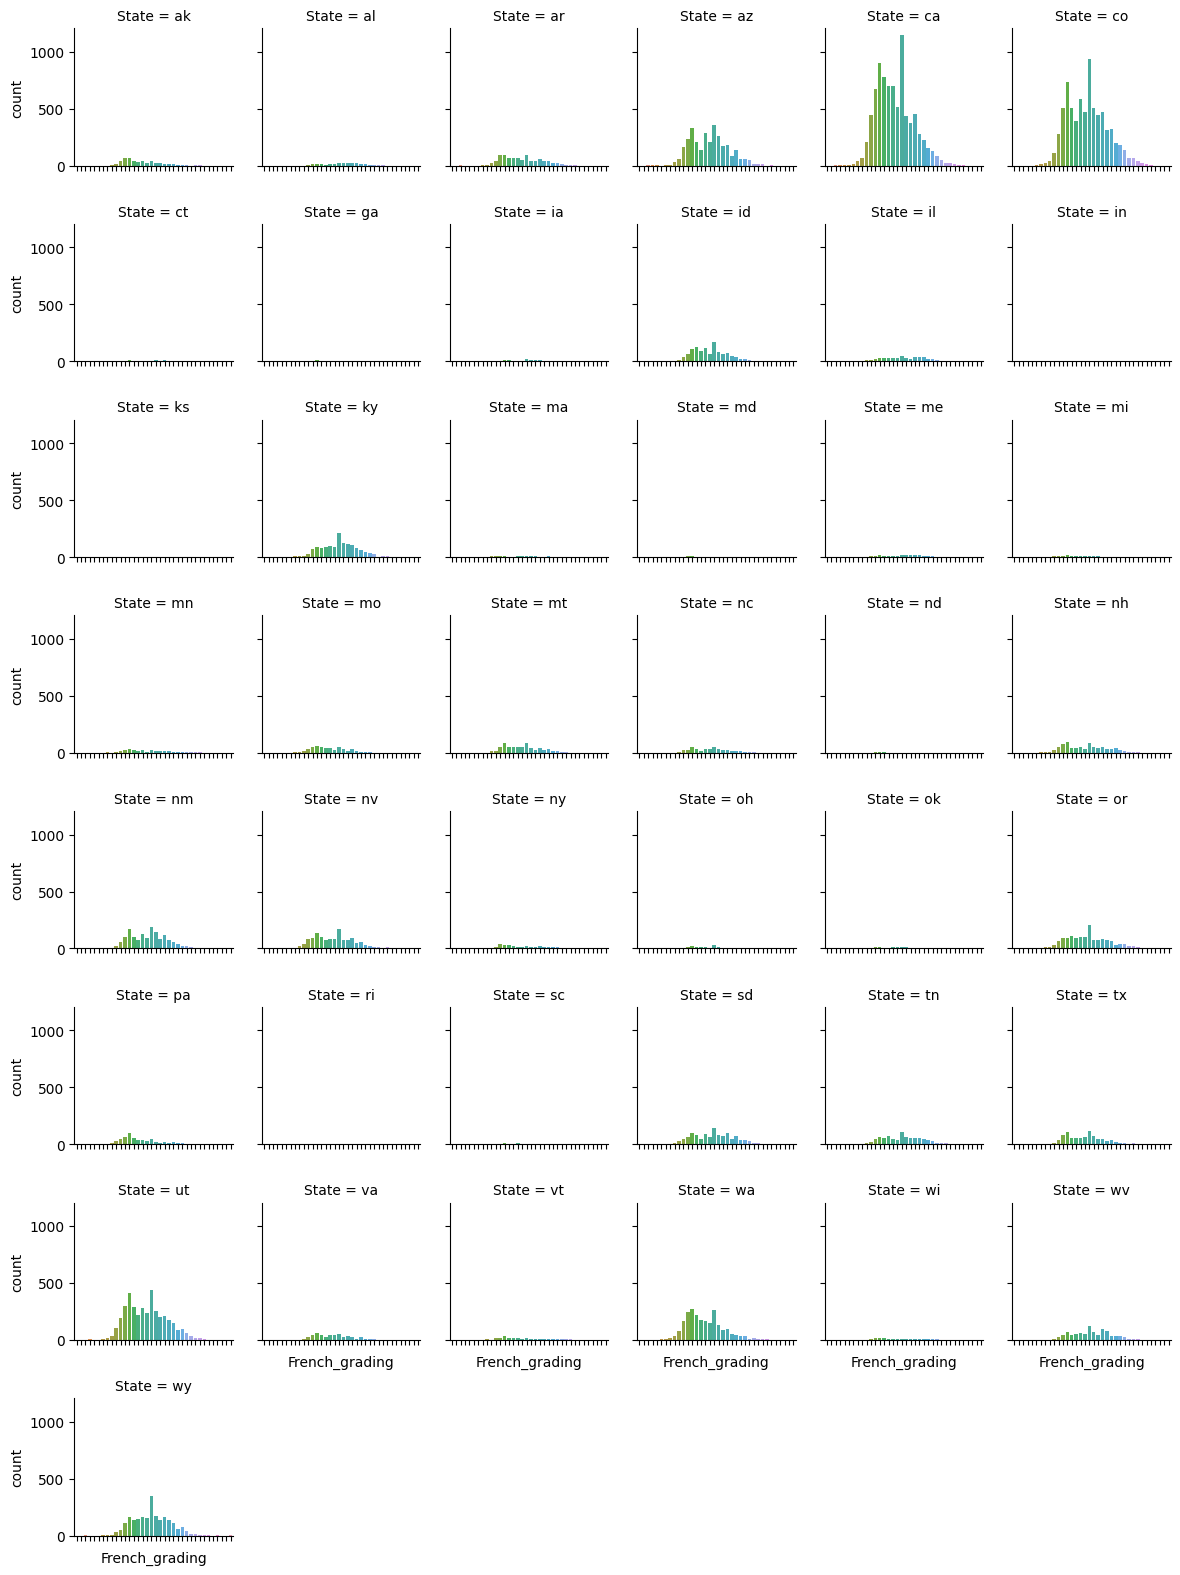

In [11]:


# plot the spread of grades across the states in a count plot.
pp= sns.catplot(x= 'French_grading', kind = 'count', data = sport, col = 'State', col_wrap= 6, height= 2,
                col_order= sorted(sport['State'].unique()))


# remove the labels to make it more readable for a purely high level overview.
sns.FacetGrid.set_xticklabels(self= pp, labels=None)
sns.FacetGrid.set_xlabels(self = pp, label = None)

# Show the plot
plt.show()

The distribution of sport climbing routes across states seems to be quite heterogeneous. Lets get the total total count of routes in every state and the proportion that is of all sport routes in the US. 

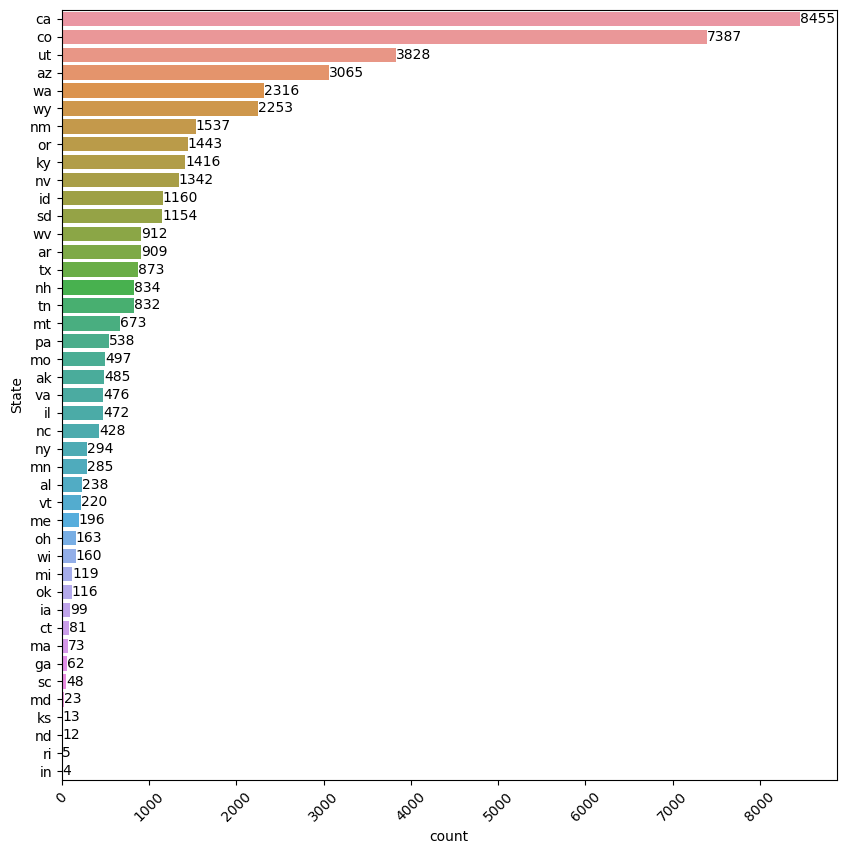

In [68]:
plt.figure(figsize=(10,10))
statecounts = sns.countplot(data = sport, y = 'State',
            order= sport['State'].value_counts().index)
plt.xticks(rotation=45)


plt.bar_label(container=statecounts.containers[0], labels=sport['State'].value_counts())

plt.show()

## Which state has the hardest sport climbing routes (most routes >=9a)?